<a href="https://colab.research.google.com/github/danielpaulMBRDI/danielpaulMBRDI/blob/main/1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Perceptron**

A naive feed-forward perceptron model -

*   *Inputs*: input features of size N
*   *Outputs*: scalar activation value (size 1)
*   *Parameters*: weights, bias, activation

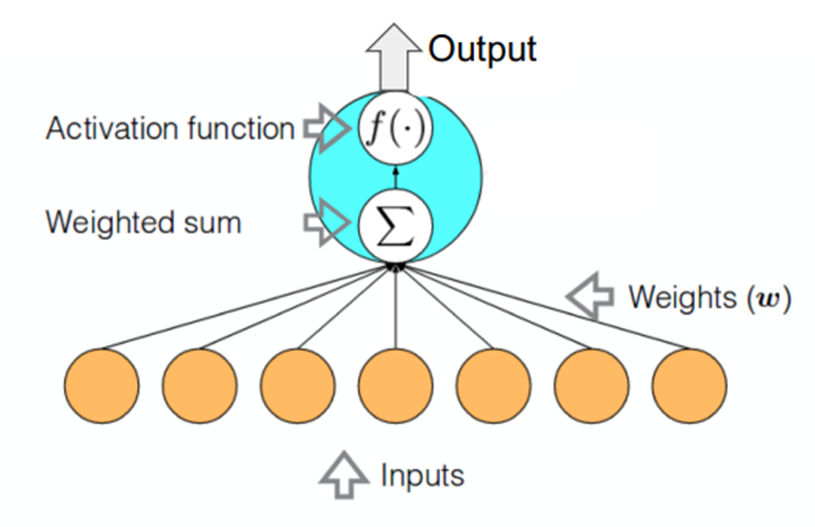

Each node computes a weighted sum of incoming values from the edges and passes it to the next layer.

***Goal***: Determine the combination of weights which minimise the “loss”


In [ ]:
!pip install fastprogress==0.1.20

In [ ]:
import numpy as np

# Linear Model

$y = w * x + b$, where $w$ is the slope and $b$ is the intercept

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1')
plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Introducing Non-Linearity

Lets use Rectified Linear Unit - ReLu Activation:

$f(x) = max(0, x)$

<img src = "https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png" width = 50% >

In [ ]:
def relu(x):
  return max(0, x)

In [ ]:
x = np.linspace(-5,5,100)
y = 2*x+1
y_relu = [relu(i) for i in y]
plt.plot(x, y_relu, '-r', label='ReLu activated y')
plt.title('Graph of y with ReLu')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Try for Sigmoid

$f(x) = \frac{1}{1+e^{-x}}$

<img src = "https://ambrapaliaidata.blob.core.windows.net/ai-storage/articles/Untitled_design_13.png" width = "50%">

In [ ]:
# Hint : Use np.exp()
def sigmoid(x):
  # [TODO]: Your code for the function goes here
  return

In [ ]:
x = np.linspace(-5,5,100)
y = 2*x+1
y_relu = [sigmoid(i) for i in y]
plt.plot(x, y_relu, '-r', label='Sigmoid activated y')
plt.title('Graph of y with Sigmoid')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# How to differentiate between Apples and Oranges..?

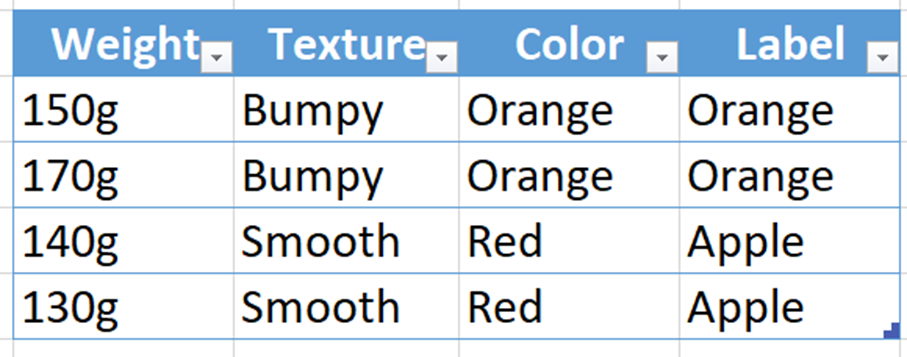

## 1. Data Preparation



In [ ]:
# This will generate your inputs for this sub-section
def get_inputs():
    
    # 0 -> Bumpy, 1 -> Smooth
    # 0 -> Red, 1-> Orange
    feature = [[150, 1, 0], [170, 1, 0], [140, 0, 1], [130, 0, 1]]
    max_weight = max([feat[0] for feat in feature])
    for ind in range(0, len(feature)):
      feature[ind] = [feature[ind][0]/max_weight, feature[ind][1], feature[ind][2]] 
    # 0 -> Orange, 1 -> Apple
    label = [0, 0, 1, 1]

    input_size = len(feature[0])
    # Let's take our weights and bias in [-1, 1] rather than [0, 1]
    weights = 2 * np.random.rand(input_size) - 1
    bias = 2 * np.random.rand(1) - 1
    
    return feature, label, weights, bias

#### 1.1 Load Inputs

In [ ]:
inputs,label, weights, bias = get_inputs()
print(len(inputs), weights.shape, bias.shape)
print(inputs)

## 2. Model Building

# **Step 1 - Forward Propagation**

Let's focus on the weighted sum and the bias as they represent the linear part of the forward function.

$a_j = \sum \limits _{i=0} ^{d} w_{ij} * x_i + b$

Taking $x = (x_{i})_{i \in [0, d]}$ as inputs and $w = (w_{i})_{i \in [0, d]}$ as weights and $b$ is the bias.

In [ ]:
# TODO: Check if everything is alright by computing WX + b
# Hint : Use np.sum()
def linear_combination(input, weights, bias):
  return

print(linear_combination(inputs[0], weights, bias))

### Define Activation (non-linearity)

A common activation function is the sigmoid (also called logistic function).

$g_h(x) = 1 / 1 + e^{-x}$

In [ ]:
# Use the sigmoid that was defined before
def sigmoid(x): return

## NaivePerceptron - Single Perceptron

We will implement a naive perceptron class. Its attributes would be its weights and bias, and apart from the constructor, we will need a forward method.

![Naive](https://www.researchgate.net/publication/355876971/figure/fig1/AS:1088097567682560@1636434084424/The-forward-propagation-of-a-neural-network-a-the-operating-process-of-neural-networks.png)

In [ ]:
class NaivePerceptron:

    def __init__(self, weights, bias, activation):
        # TODO: set the weights, bias and activation attributes of the NaivePerceptron class using the constructor arguments
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def forward(self, x):
        """
        Compute the activation value for a given input
        Args:
            x (np.array): 1D-numpy array of the same size as the weights
        Returns:
            res (float): the activation value corresponding to the input
        """
        # TODO: compute WX + b where W represents the Weights, X the input and b the bias
        lin_comb = linear_combination(x, self.weights, self.bias)
        # TODO: compute the activation of this value
        res = self.activation(lin_comb)

        return res

In [ ]:
p = NaivePerceptron(weights, bias, activation=sigmoid)
p.forward(inputs)

## 2. Model Building

## Perceptron Layer - Multiple Perceptrons

Alright, we got 1 perceptron but state-of-the-art architectures have thousands of them. So we need to be able to stack many of them in a consistent way: a perceptron layer.

### Layer of Perceptrons

### 1. Define Each Layer

In [ ]:
class Layer:

    def __init__(self, input_size, output_size, activation):
        # TODO: initialize the weights and biases to random values between [-1, 1] and set the activation function
        self.weights = 2 * np.random.random((input_size, output_size)) - 1
        self.bias = 2 * np.random.random(output_size) - 1
        self.activation = activation

    def forward(self, x):
        """
        Compute the activation value for a given input
        Args:
            x (np.array): 1D-numpy array of the same size as the weights
        Returns:
            res (np.array): the activation values corresponding to the input
        """

        # TODO: compute WX + b where W represents the weights, X the input and b the biases
        p = NaivePerceptron(self.weights, self.bias, self.activation)
        # TODO: compute the activation of all perceptroons at once
        res = p.forward(x)
        return res

### MultiLayer Perceptron - Multiple Layers



### 2. Define the MLP

In [ ]:
class MLP:

    def __init__(self, layer_sizes, activation):
        # TODO: assign a list of consecutive layers to self.layers while the same activation respecting the input and consecutive output sizes
        self.layers = [Layer(layer_sizes[sx], layer_sizes[sx+1], activation=activation) for sx in range(len(layer_sizes)-1)]

    def forward(self, x, intermediate=False):
        """
        Compute the network output for a given input
        Args:
            x (np.array): 1D-numpy array of the same size as the first layer weights
        Returns:
            res (np.array): the network output
        """
        feats = [x]
        # Better to initialize a fixed-length output (easier to spot errors)
        res = x
        for layer_idx in range(len(self.layers)):
            # TODO: iteratively forward the input to each layer
            res = self.layers[layer_idx].forward(res)
            feats.append(res)
        if intermediate:
          return res, feats
        return res

### 3. Choose number of inputs

In [ ]:
# Choose the number of inputs (feel free to change this)
input_size = 3 # Number of Features
nb_perceptrons = 8 # (feel free to change this)
output_size = 1 # Binary Classification

### 4. Check Single Layer

In [ ]:
l = Layer(input_size, nb_perceptrons, activation=sigmoid)
l.forward(inputs)

In [ ]:
# Choose the number of inputs (feel free to change this)
layer_output_sizes = (input_size, nb_perceptrons, 4, output_size)

### 4. Check Multiple Layers

In [ ]:
mlp = MLP(layer_output_sizes, activation=sigmoid)
out = mlp.forward(inputs)
out

In [ ]:
sample_inp = np.linspace(-5, 5, 100)
sample_inp = np.repeat(sample_inp, 3).reshape((100, -1))

In [ ]:
out, feats = mlp.forward(sample_inp, True)

In [ ]:
for lx in range(len(layer_output_sizes)):
  n_plots = layer_output_sizes[lx]
  plt.figure(lx, figsize=(3*n_plots, 5))
  for px in range(n_plots):
    plt.subplot(1, n_plots, px+1)
    plt.scatter(range(100), feats[lx][:, px])
  plt.show()

This missing part is about the update of this network's parameters, with the famously known backpropagation.

# **Step 2 - Loss minimization**

Using the previous matrix understanding of a layer forward operation:

$y_k = g_o(a_k)$, where $a_k = \sum \limits _{k=0} ^{M} w_{jk} * z_j + b$

Assuming that we expected the output to be $y$, we can define a loss function, Mean Squared Errors (MSE) in this case:

$l(y, \hat{y}_k) = Σ_{x} Σ_{k} (y_k - \hat{y}_k)^2$

In [ ]:
def compute_loss(expected, output):
    """
    Compute the loss for a given expected and computed output
    Args:
        expected (np.array): 1D-numpy array
        output (np.array): 1D-numpy array of same size as expected
    Returns:
        loss (float): loss respective to expected and output
    """
    
    # TODO: compute the MSE loss
    # 1. np.subtract
    # 2. np.square
    # 3. mean()
    return

In [ ]:
print(compute_loss(label, out))

# **Step 3 - Gradient Descent**

Our objective is to minimize the Loss to be as close as possible to y, and in order to find a minimum, what better option is there than derivation.

$\triangledown_{w}l(y_i, \hat{y}_i) = \frac{δl(y_i,\hat{y}_i)}{δw}$

# **Step 4 - Back Propagation**

As we aim at finding minima of the loss function (where the gradient of the loss function is zero), we will update our weights as follows:

$w ← w - η \frac{δl(y_i,\hat{y}_i)}{δw} = w - η \triangledown_{w}l(y_i, \hat{y}_i)$,

where $η$ is the learning rate and $\triangledown_{w}l$ represents the gradient of L relatively to the weights.

![Gradient descent](https://cdn-images-1.medium.com/max/800/1*HrFZV7pKPcc5dzLaWvngtQ.png "Gradient descent on loss")
*Source: http://sebastianraschka.com/ — Python Machine Learning, 2nd Edition*

### 1. Define Derivatives of Activation Functions

In [ ]:
## TODO: define right here the expressions of sigmoid and sigmoid_prime 
def sigmoid(x): return 1/(1 + np.exp(-x))
def sigmoid_prime(x): return sigmoid(x)*(1-sigmoid(x))

### 2. Define Activation Layer

In [ ]:
class Activation:

    def __init__(self, function, derivative):
        # TODO: initialiaze the function and its derivative
        self.function = function
        self.derivative = derivative

    def forward(self, x):
        """
        Compute the function value for a given input
        Args:
            x (np.array): 1D-numpy array input
        Returns:
            a (np.array): the function values corresponding to the input
        """
        # TODO: apply the function to the input for forwarding
        return self.function(x)

    def prime(self, y):
        """
        Compute the function's derivative value for a given input
        Args:
            y (np.array): 1D-numpy array input
        Returns:
            a_prime (np.array): the function's derivative values corresponding to the input
        """
        # TODO: apply the function's derivative
        return self.derivative(y)

In [ ]:
activation = Activation(sigmoid, sigmoid_prime)
print(activation.forward(0), activation.prime(0))

Now that we have a more versatile object for activation, we need to work on the weight update.
During the forward pass, as we compute the weighted sum with the bias, we will store the value of $\sigma'$ for this weighted sum. 

### 3. Build Single Perceptron with Weight Update

In [ ]:
def linear_combination_single(inp, weights, bias):
  return np.sum(weights * inp) + bias

In [ ]:
class Perceptron:

    # We store input, output, the gradient of the activation function and the gradiant of the linear combination
    inputs = None
    output = None
    activation_grad = None
    grad_z = None

    def __init__(self, weights, bias, activation, requires_grad=True):
        # TODO: set the weights, bias and activation attributes of the NaivePerceptron class using the constructor arguments
        self.weights = weights
        self.bias = bias
        self.activation = activation
        # This last argument is a boolean choice to speed up computation by storing gradient on forward pass to speed up the backward pass
        self.requires_grad = requires_grad

    def forward(self, x):
        """
        Compute the activation value for a given input according to the choice of weights, bias and activation
        Args:
            x (np.array): 1D-numpy array (size = weights.size)
        Returns:
            output (float): the activation value corresponding to the input
        """
        # TODO: store the input into your corresponding object attribute
        self.inputs = x
        # TODO: compute WX + b where W represents the weights, X the input and b the biases
        z = linear_combination_single(x, self.weights, self.bias)
        # TODO: compute the activation of this value
        self.output = self.activation.forward(z)
        # TODO: compute the activation of the linear combination
        # TODO: if the gradient was required, store activation'(WX + B)
        if self.requires_grad:
            self.activation_grad = self.activation.prime(self.output)
        return self.output
    
    def compute_loss(self, expected, output):
        """
        Compute the loss for a given expected and computed output
        Args:
            expected (np.array): 1D-numpy array
            output (np.array): 1D-numpy array of same size as expected
        Returns:
            loss (float): loss respective to expected and output
        """
        
        # TODO: compute the MSE loss
        squared_errors = np.sum((expected - output) ** 2)
        # print("ERROR: ", expected, output)
        
        return squared_errors

    def backward(self, y):
        """
        Update the value of the loss gradient relatively to z (weighted sum with bias)
        Args:
            y (float): the loss gradient relatively to the perceptron activation value
        """
        if not self.requires_grad:
            raise ValueError("Gradient was not required on forward")
        else:
            # TODO: compute the loss gradient relatively to the weighted sum with the bias (=2 * error * activation'(WX + B))
            error = self.compute_loss(y, self.output)
            self.grad_z = -2 * (y - self.output) * self.activation_grad

    def update_params(self, alpha):
        """
        Update the weight and bias of the perceptron using the information computed during the backward pass
        Args:
            alpha (float): learning rate
        """
        if self.grad_z is None:
            raise ValueError("You need to backpropagate error before updating the weights")
        else:
            # TODO: update the weights (- alpha * 2 * error * activation'(WX +B) * X)
            # print( alpha * np.dot(self.grad_z, self.inputs) / len(self.inputs))
            self.weights -= alpha * np.dot(self.grad_z, self.inputs)
            # TODO: update the bias (- alpha * 2 * error * activation'(WX +B))
            self.bias -= alpha * self.grad_z

In [ ]:
inputs,label, weights, bias = get_inputs()
print(len(inputs), weights.shape, bias.shape)
print(inputs)

In [ ]:
p = Perceptron(weights, bias[0], activation=activation)
[p.forward(input) for input in inputs.tolist()]

### 4. Train Multiple Perceptrons with Weight Updates

In [ ]:
# Hyperparameters (feel free to change them)
alpha = 1e-3
nb_iterations = 1000
nb_epochs = 10

# Let's try to approximate the normalized sum (mean) of the input
# Note: we can't just sum as the perceptron output is squeezed by our activation choice
# Note: feel free to change the activation to ReLU for instance
y = label
# Training Loop
for epoch in range(20):
    loss = 0
    idx = 0
    # output = inputs[]
    for input in inputs:
        # TODO: forward the input
        output = p.forward(input)
        # TODO: backpropagate the gradient of the loss
        p.backward(y[idx])
        # TODO: update the weights and bias of the perceptron
        p.update_params(0.3)
        # TODO: update the total loss (do not divide by the number of terms)
        loss += p.compute_loss(y[idx], output)
        idx += 1
    # mb.main_bar.comment = f"completed epoch {epoch+1}"
    print(f"Epoch {epoch+1}: MSE {np.mean(loss)}")

In [ ]:
[p.forward(input) for input in inputs.tolist()]

In [ ]:
y